<a href="https://colab.research.google.com/github/Somu-Gen/WQI_Streamlit/blob/main/Water_Quality_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats

pd.options.mode.chained_assignment = None

In [ ]:
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

In [ ]:
df = pd.read_csv("/content/water_potability.csv")

In [ ]:
print(df)

            ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.1

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.Potability.value_counts()
#there is a class imbalance

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(2011, 10)

In [ ]:
#seeing correlation between features
cor=df.drop('Potability',axis=1).corr()
cor

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000


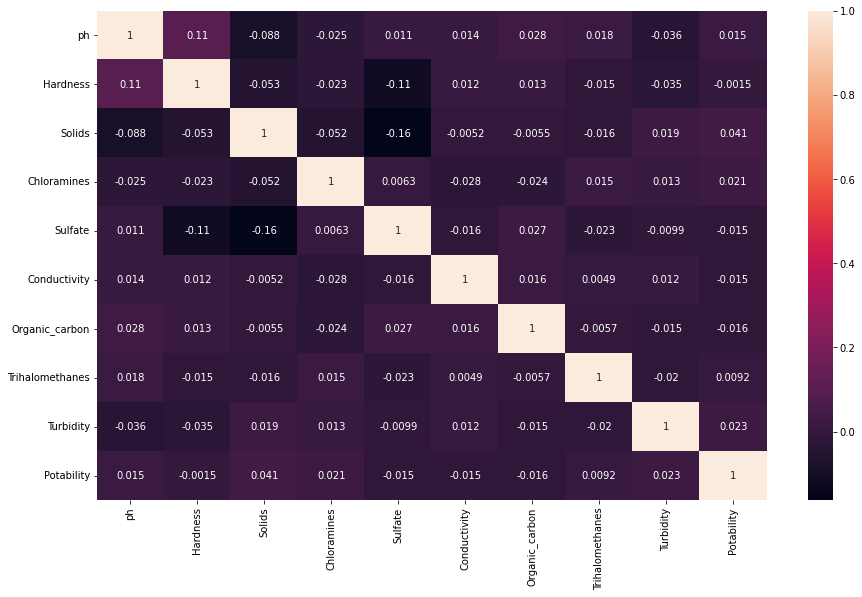

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

In [ ]:
X = df.drop('Potability', axis=1)
y = df.Potability

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Models
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# metrics
from sklearn.metrics import precision_score,accuracy_score

In [ ]:
model=RandomForestClassifier(n_estimators=500,random_state=20)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = precision_score(y_test, y_pred,average='macro')
accuracy_score(y_test,y_pred)

0.7036423841059603

In [ ]:
score

0.7156854256854257

In [ ]:
#training Knn classifier
model1= KNeighborsClassifier(n_neighbors=10)
model1.fit(X_train,y_train)

Y_pred_10=model1.predict(X_test)
print(accuracy_score(y_test,Y_pred_10))

0.5794701986754967


In [ ]:
dt=DecisionTreeClassifier().fit(X_train,y_train)
y_pred2=dt.predict(X_test)
accuracy_score(y_test,y_pred2)

0.6291390728476821

In [ ]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

In [ ]:
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name+" = "+str(accuracy_score(y_test,y_pred)))

LR = 0.5860927152317881
SVC = 0.5811258278145696
KNN = 0.5794701986754967
DTC = 0.6158940397350994
GNB = 0.6158940397350994
SGDC = 0.4205298013245033
Perc = 0.41887417218543044
NC = 0.47516556291390727
Ridge = 0.5827814569536424
NuSVC = 0.5231788079470199
BNB = 0.5811258278145696
RF = 0.6804635761589404
ADA = 0.6026490066225165
XGB = 0.6605960264900662
PAC = 0.5811258278145696


In [ ]:
#Here the classes are imbalanced and we are getting low accuracy
y.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [ ]:
data_1=pd.DataFrame(df[df["Potability"]==1])
data_0=pd.DataFrame(df[df["Potability"]==0])

data_1.shape,data_0.shape

((811, 10), (1200, 10))

#We over sample data1 to 1200 so class is balanced

In [ ]:
data_1=data_1.sample(1200,replace=True,random_state=101)
new_data=pd.concat([data_0,data_1])

In [ ]:
data_1.shape,data_0.shape

((1200, 10), (1200, 10))

In [ ]:
X1 = new_data.drop('Potability', axis=1)
Y1 = new_data.Potability

X_train1, X_test1, Y_train1, Y_test1= train_test_split(X1, Y1, test_size=0.30)

In [ ]:
#training Knn classifier
model1= KNeighborsClassifier(n_neighbors=10)
model1.fit(X_train1,Y_train1)

Y_pred_11=model1.predict(X_test1)
print(accuracy_score(y_test,Y_pred_10))

0.5794701986754967


In [ ]:
dt=DecisionTreeClassifier().fit(X_train1,Y_train1)
Y_pred2=dt.predict(X_test1)
accuracy_score(Y_test1,Y_pred2)

0.7583333333333333

In [ ]:
rf=RandomForestClassifier().fit(X_train1,Y_train1)
Y_pred3=rf.predict(X_test1)
accuracy_score(Y_test1,Y_pred3)

0.8305555555555556

In [ ]:
rf=RandomForestClassifier(n_estimators=500,random_state=20).fit(X_train1,Y_train1)
Y_pred3=rf.predict(X_test1)
accuracy_score(Y_test1,Y_pred3)

0.8152777777777778

In [ ]:
gnb = GaussianNB().fit(X_train1,Y_train1)
Y_pred4=dt.predict(X_test1)
accuracy_score(Y_test1,Y_pred4)

0.7583333333333333

In [ ]:
for name,model in models:
    model.fit(X_train1, Y_train1)
    y_pred = model.predict(X_test1)
    print(name+" = "+str(accuracy_score(Y_test1,y_pred)))

LR = 0.5055555555555555
SVC = 0.4930555555555556
KNN = 0.5875
DTC = 0.7611111111111111
GNB = 0.6027777777777777
SGDC = 0.5236111111111111
Perc = 0.4722222222222222
NC = 0.5236111111111111
Ridge = 0.5166666666666667
NuSVC = 0.4708333333333333
BNB = 0.4722222222222222
RF = 0.8166666666666667
ADA = 0.5861111111111111
XGB = 0.7083333333333334
PAC = 0.4722222222222222


In [ ]:
# Create Data
x=['LR','KNN','Ridge','RF']
y = accuracy_score(y_test,y_pred)

# Simple Bar Plot
plt.bar(x,y)
plt.xlabel('Categories')
plt.ylabel("Values")
plt.title('classifiers Bar Plot')
plt.show()

ValueError: ignored

In [ ]:
print(X_test)

            ph    Hardness        Solids  Chloramines     Sulfate  \
2218  5.574756  189.700665  11512.465840     8.720972  329.939631   
1709  8.040188  201.809216  11861.550850     7.200310  300.398435   
2378  5.800034  181.453515  13028.688460     6.106765  374.357784   
1722  7.566517  205.396582  30823.730490     7.816636  354.175972   
175   4.430281  139.685759  28862.257170     8.961372  298.379458   
...        ...         ...           ...          ...         ...   
2246  5.573201  229.174986  15613.160530     4.157902  383.481116   
2851  8.164000  195.212495  27414.899120     5.412481  231.724225   
395   7.146976  196.562685  16911.203770     6.890505  320.100875   
292   8.291299  211.217034  20008.134960     8.767875  275.767321   
2581  6.363836  207.422436   9844.702293     9.765921  320.630725   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
2218    331.330353       18.016991        66.188642   4.371806  
1709    420.549218        7.168607       

In [ ]:
print(Y_pred3)

[0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0
 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0
 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1
 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0
 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 0 